<ipython-input-17-7e8ff78d49ad>:24: RuntimeWarning: divide by zero encountered in true_divide
  H_hp1 = 1 / (1 + (D0_1 / D)**(2*n))
<ipython-input-17-7e8ff78d49ad>:25: RuntimeWarning: divide by zero encountered in true_divide
  H_hp2 = 1 / (1 + (D0_2 / D)**(2*n))
<ipython-input-17-7e8ff78d49ad>:27: RuntimeWarning: divide by zero encountered in true_divide
  H_hp3 = 1 / (1 + (D0_1 / D)**(2*n_2))
<ipython-input-17-7e8ff78d49ad>:28: RuntimeWarning: divide by zero encountered in true_divide
  H_hp4 = 1 / (1 + (D0_2 / D)**(2*n_2))
<ipython-input-17-7e8ff78d49ad>:70: RuntimeWarning: divide by zero encountered in true_divide
  H_hp1 = 1 / (1 + (D0_1 / D)**(2*n))
<ipython-input-17-7e8ff78d49ad>:85: RuntimeWarning: divide by zero encountered in true_divide
  H_hp2 = 1 / (1 + (D0_2 / D)**(2*n))
<ipython-input-17-7e8ff78d49ad>:101: RuntimeWarning: divide by zero encountered in true_divide
  H_hp3 = 1 / (1 + (D0_1 / D)**(2* n_2))
<ipython-input-17-7e8ff78d49ad>:117: RuntimeWarning: divide by zero 

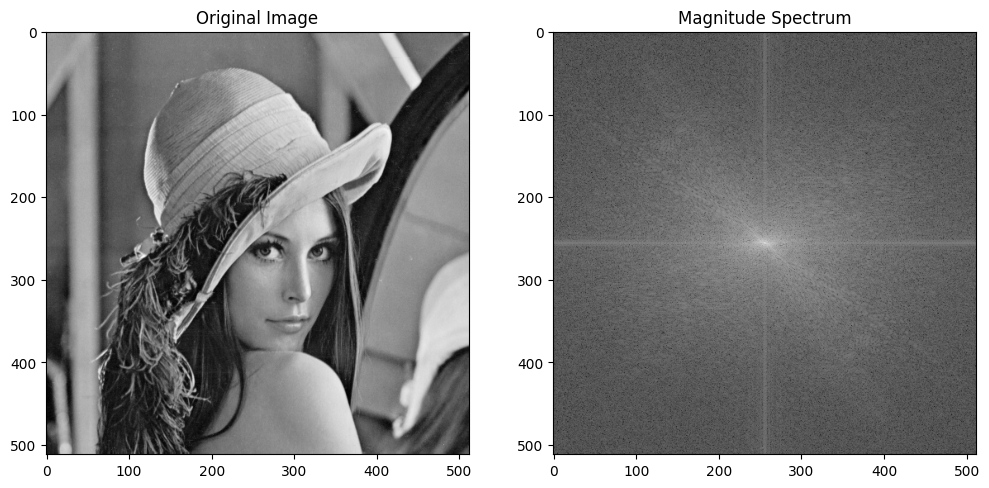

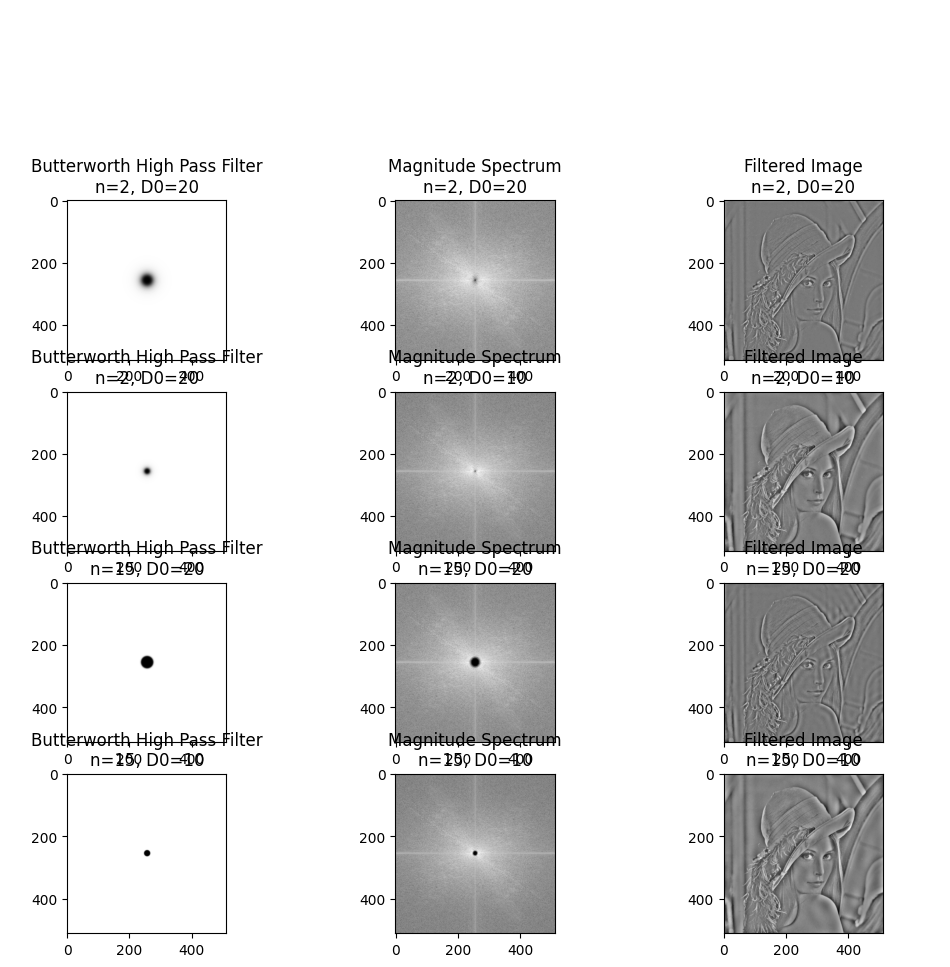

In [17]:

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load image
img = Image.open('Lenna.png').convert('L')

F = np.fft.fft2(img)
F_shifted = np.fft.fftshift(F)
F_mag = np.log(1 + np.abs(F_shifted))

n = 2
D0_1 = 20
D0_2 = 10
n_2 = 10

M, N = img.size
u, v = np.meshgrid(np.arange(-N/2, N/2), np.arange(-M/2, M/2))
D = np.sqrt(u**2 + v**2)

H_hp1 = 1 / (1 + (D0_1 / D)**(2*n))
H_hp2 = 1 / (1 + (D0_2 / D)**(2*n))

H_hp3 = 1 / (1 + (D0_1 / D)**(2*n_2))
H_hp4 = 1 / (1 + (D0_2 / D)**(2*n_2))

F_filtered1 = F_shifted * H_hp1
F_filtered2 = F_shifted * H_hp2
F_filtered3 = F_shifted * H_hp3
F_filtered4 = F_shifted * H_hp4


img_hp1 = np.real(np.fft.ifft2(np.fft.ifftshift(F_filtered1)))
img_hp2 = np.real(np.fft.ifft2(np.fft.ifftshift(F_filtered2)))
img_hp3 = np.real(np.fft.ifft2(np.fft.ifftshift(F_filtered3)))
img_hp4 = np.real(np.fft.ifft2(np.fft.ifftshift(F_filtered4)))



fig, axs = plt.subplots(1, 2, figsize=(12, 6))


axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(mag_spec, cmap='gray')
axs[1].set_title('Magnitude Spectrum')

fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(12, 12))

axs[0, 0].set_axis_off()  

F = np.fft.fft2(img)
F_shifted = np.fft.fftshift(F)

mag_spec = np.log(1 + np.abs(F_shifted))

axs[0, 1].set_axis_off()  

axs[0, 2].set_axis_off()  

H_hp1 = 1 / (1 + (D0_1 / D)**(2*n))
F_filtered1 = H_hp1 * F_shifted
F_mag_filtered1 = np.log(1 + np.abs(F_filtered1))
img_hp1 = np.fft.ifft2(np.fft.ifftshift(F_filtered1)).real

axs[1, 0].imshow(H_hp1, cmap='gray')
axs[1, 0].set_title('Butterworth High Pass Filter\nn=2, D0={}'.format(D0_1))

axs[1, 1].imshow(F_mag_filtered1, cmap='gray')
axs[1, 1].set_title('Magnitude Spectrum\nn=2, D0={}'.format(D0_1))

axs[1, 2].imshow(img_hp1, cmap='gray')
axs[1, 2].set_title('Filtered Image\nn=2, D0={}'.format(D0_1))

H_hp2 = 1 / (1 + (D0_2 / D)**(2*n))
F_filtered2 = H_hp2 * F_shifted
F_mag_filtered2 = np.log(1 + np.abs(F_filtered2))
img_hp2 = np.fft.ifft2(np.fft.ifftshift(F_filtered2)).real


axs[2, 0].imshow(H_hp2, cmap='gray')
axs[2, 0].set_title('Butterworth High Pass Filter\nn=2, D0={}'.format(D0_1))

axs[2, 1].imshow(F_mag_filtered2, cmap='gray')
axs[2, 1].set_title('Magnitude Spectrum\nn=2, D0={}'.format(D0_2))

axs[2, 2].imshow(img_hp2, cmap='gray')
axs[2, 2].set_title('Filtered Image\nn=2, D0={}'.format(D0_2))

H_hp3 = 1 / (1 + (D0_1 / D)**(2* n_2))
F_filtered3 = H_hp3 * F_shifted
F_mag_filtered3 = np.log(1 + np.abs(F_filtered3))
img_hp3 = np.fft.ifft2(np.fft.ifftshift(F_filtered3)).real


axs[3, 0].imshow(H_hp3, cmap='gray')
axs[3, 0].set_title('Butterworth High Pass Filter\nn=15, D0={}'.format(D0_1))

axs[3, 1].imshow(F_mag_filtered3, cmap='gray')
axs[3, 1].set_title('Magnitude Spectrum\nn=15, D0={}'.format(D0_1))

axs[3, 2].imshow(img_hp3, cmap='gray')
axs[3, 2].set_title('Filtered Image\nn=15, D0={}'.format(D0_1))

H_hp4 = 1 / (1 + (D0_2 / D)**(2 * n_2 ))
F_filtered4 = H_hp4 * F_shifted
F_mag_filtered4 = np.log(1 + np.abs(F_filtered4))
img_hp4 = np.fft.ifft2(np.fft.ifftshift(F_filtered4)).real

axs[4, 0].imshow(H_hp4, cmap='gray')
axs[4, 0].set_title('Butterworth High Pass Filter\nn=15, D0={}'.format(D0_2))

axs[4, 1].imshow(F_mag_filtered4, cmap='gray')
axs[4, 1].set_title('Magnitude Spectrum\nn=15, D0={}'.format(D0_2))

axs[4, 2].imshow(img_hp4, cmap='gray')
axs[4, 2].set_title('Filtered Image\nn=15, D0={}'.format(D0_2))

plt.show()



